# 🔍 Análisis Temporal Avanzado - Consumer Complaint Database (CFPB)

Este notebook realiza un análisis temporal avanzado de las quejas de consumidores, enfocándose en:
- Agrupación de quejas por trimestre y año
- Evolución del volumen por producto
- Detección de productos emergentes y en declive

**Rango temporal:** 2020-12-01 a 2025-04-06  
**Productos únicos:** 21

## 1. Importación de librerías y carga de datos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [5]:
# Cargar el dataset
print("Cargando dataset...")
new_df = pd.read_csv('new_dataset.csv')

# Convertir la columna de fecha
new_df['date_received'] = pd.to_datetime(new_df['date_received'])
new_df['product'] = new_df['product'].astype('category')    
new_df['year'] = new_df['date_received'].dt.year
new_df['month'] = new_df['date_received'].dt.month

print(f"Dataset cargado: {len(new_df):,} filas, {new_df.shape[1]} columnas")
print("\nPrimeras 5 filas:")
new_df.head()

Cargando dataset...
Dataset cargado: 8,509,423 filas, 15 columnas

Primeras 5 filas:


,date_received,product,sub_product,issue,sub_issue,company,state,zip_code,submitted_via,company_response_to_consumer,timely_response,consumer_disputed,consumer_complaint_narrative,year,month
0,2025-03-21,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,Experian Information Solutions Inc.,LA,71202,Web,In progress,Yes,NaN,NaN,2025,3
1,2025-03-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75072,Web,In progress,Yes,NaN,NaN,2025,3
2,2025-03-19,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10467,Web,In progress,Yes,NaN,NaN,2025,3
3,2025-04-04,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,Web,In progress,Yes,NaN,NaN,2025,4
4,2025-04-04,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,"EQUIFAX, INC.",TX,75204,Web,In progress,Yes,NaN,NaN,2025,4


## 2. Análisis Temporal Optimizado (2020-2025)

🔍 ANÁLISIS TEMPORAL AVANZADO (2020-2025)
Datos filtrados: 6,640,205 registros
Productos únicos: 14

📊 1. Evolución Trimestral


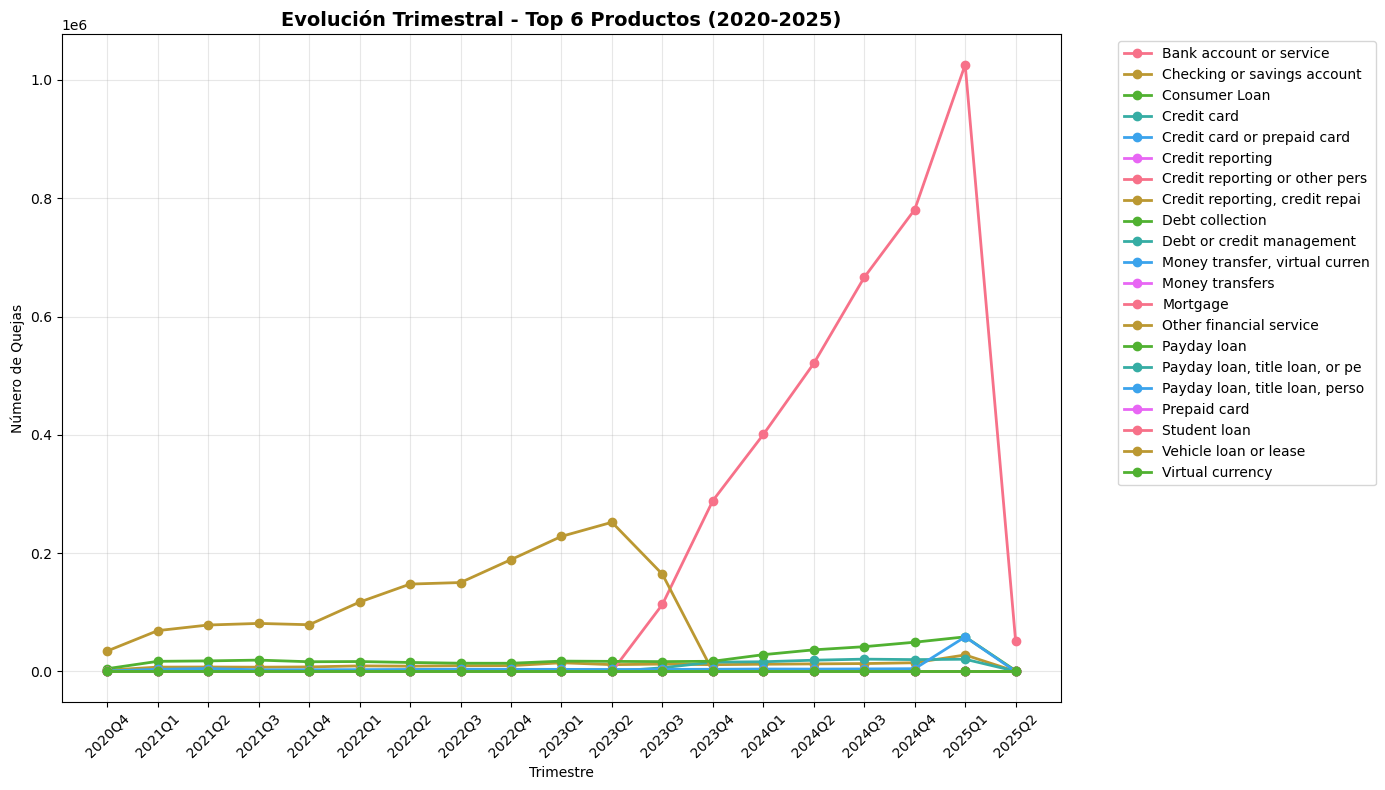


🔥 2. Heatmap Anual


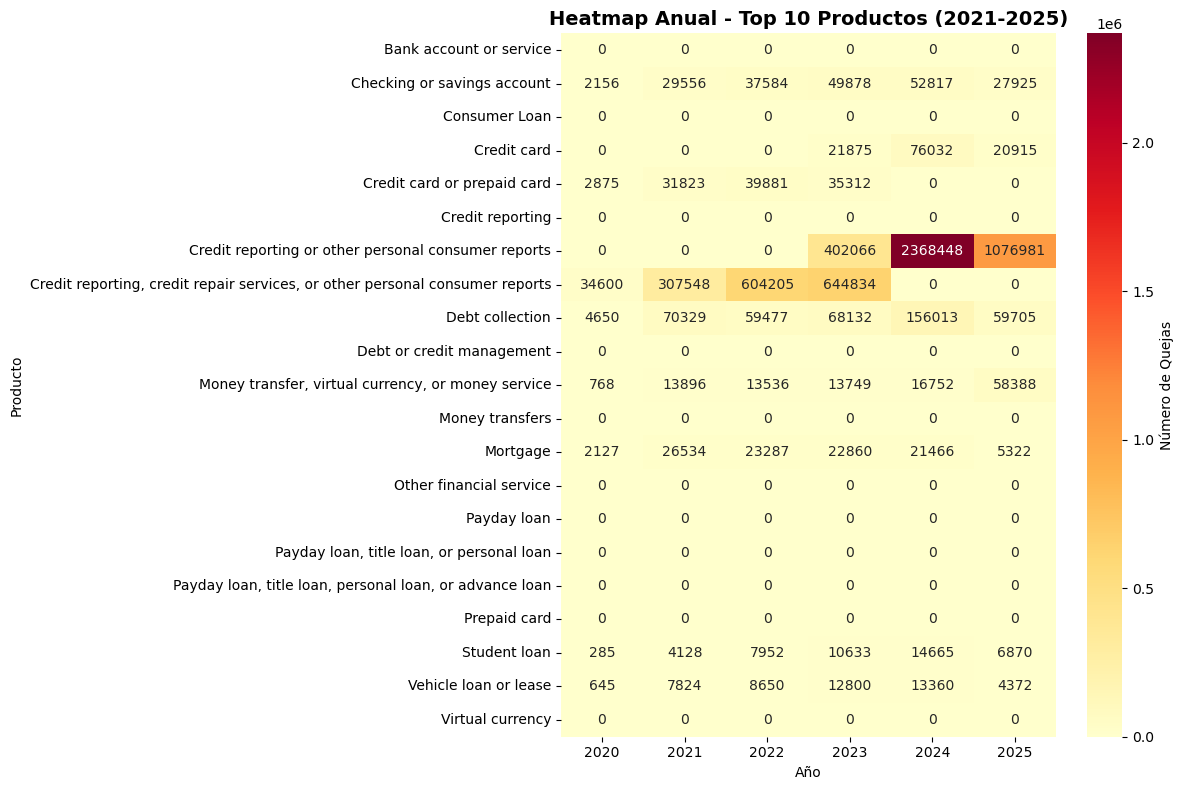


📈 3. Productos Emergentes y en Declive


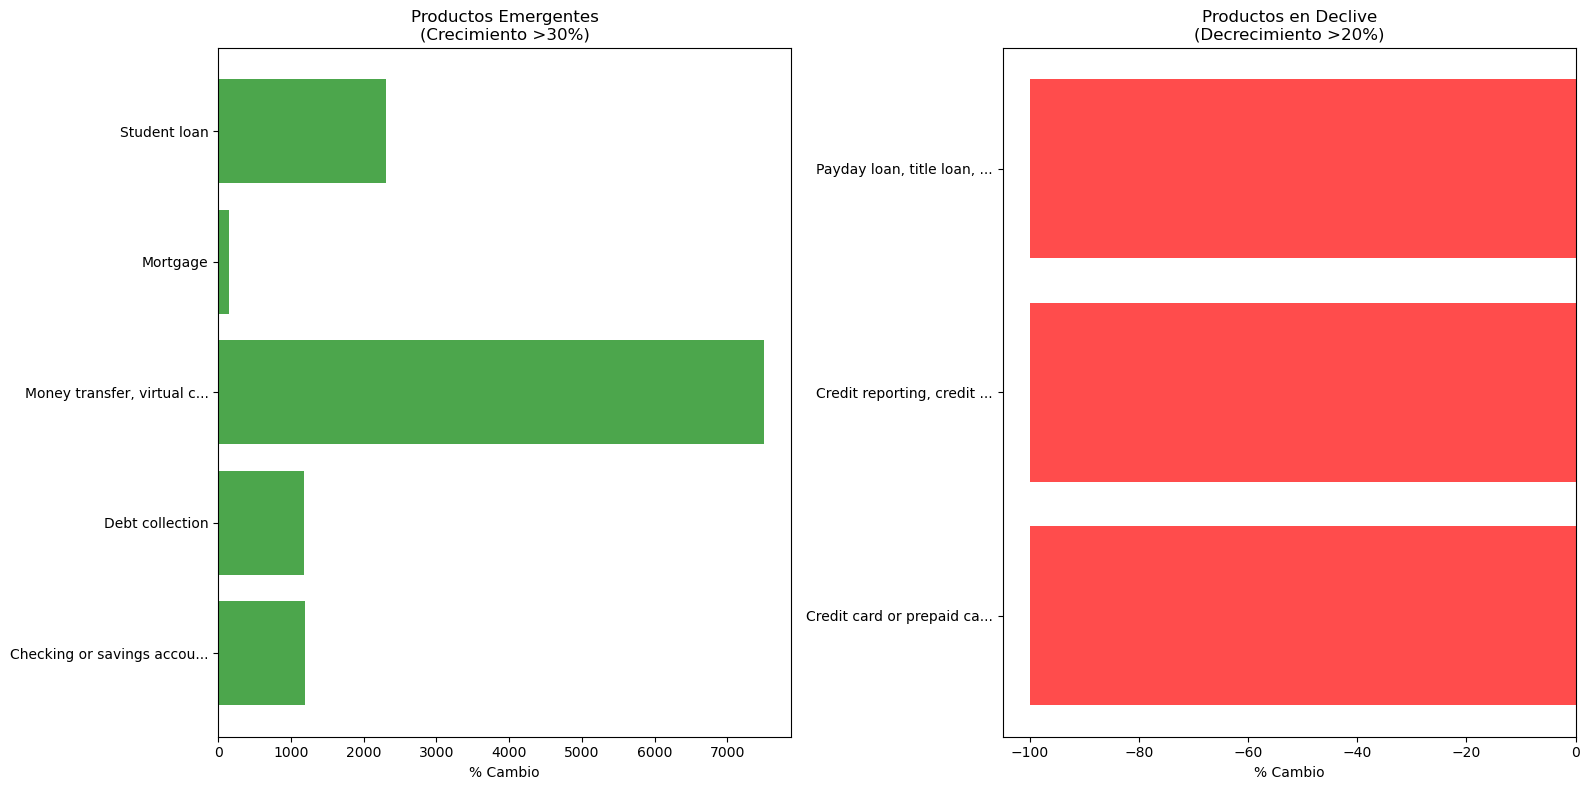

Productos emergentes encontrados: 6
Productos en declive encontrados: 3

📉 4. Análisis de Volatilidad Mensual


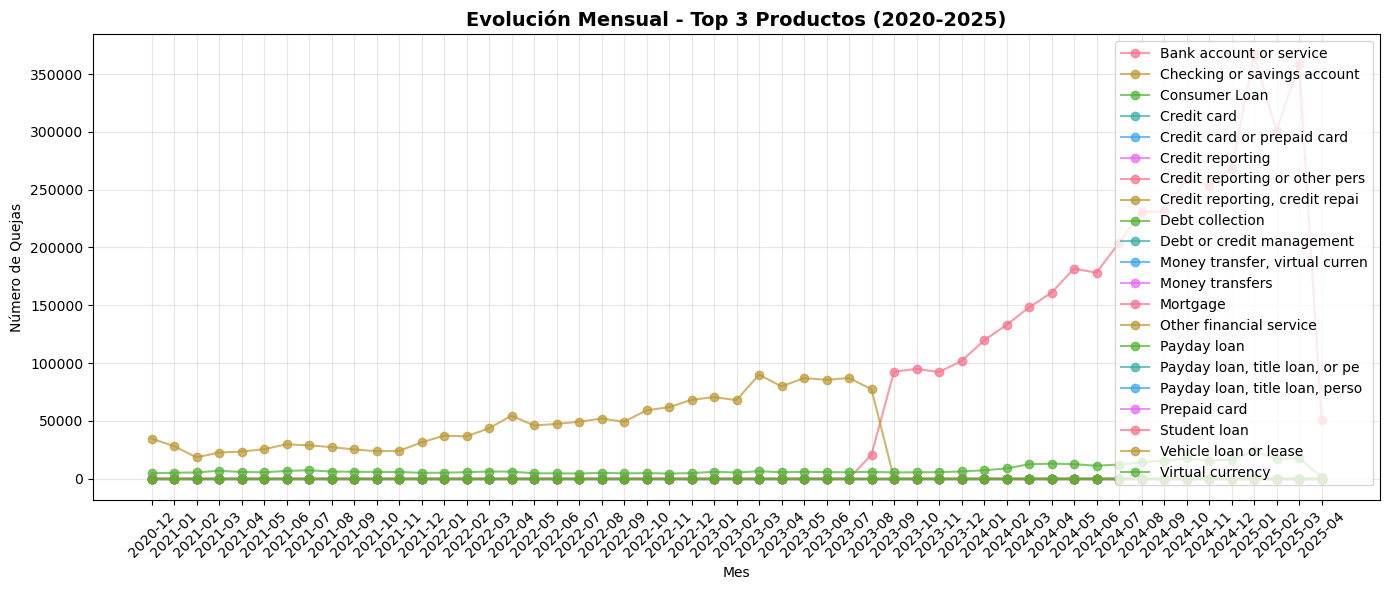

Coeficiente de Variación (Volatilidad):
Bank account or service: 0.000
Checking or savings account: 0.000
Consumer Loan: 0.000
Credit card: 0.000
Credit card or prepaid card: 0.000
Credit reporting: 0.000
Credit reporting or other personal consu: 1.492
Credit reporting, credit repair services: 0.983
Debt collection: 0.589
Debt or credit management: 0.000
Money transfer, virtual currency, or mon: 0.000
Money transfers: 0.000
Mortgage: 0.000
Other financial service: 0.000
Payday loan: 0.000
Payday loan, title loan, or personal loa: 0.000
Payday loan, title loan, personal loan, : 0.000
Prepaid card: 0.000
Student loan: 0.000
Vehicle loan or lease: 0.000
Virtual currency: 0.000

✅ Análisis temporal completado!


In [19]:
# Ejecutar análisis temporal filtrado
exec(open('analisis_temporal_filtrado.ipynb').read())

# Ejecutar el análisis completo
results = run_temporal_analysis(new_df)

## 3. Resumen de Resultados

In [20]:
# Mostrar resumen de productos emergentes y en declive
print("📈 PRODUCTOS EMERGENTES (Crecimiento >30%):")
for product, change in list(results['emerging_products'].items())[:5]:
    print(f"• {product[:50]}: +{change:.1f}%")

print("\n📉 PRODUCTOS EN DECLIVE (Decrecimiento >20%):")
for product, change in list(results['declining_products'].items())[:5]:
    print(f"• {product[:50]}: {change:.1f}%")

print("\n📊 ESTADÍSTICAS DEL PERÍODO (2020-2025):")
print(f"• Total de registros analizados: {len(results['temporal_df']):,}")
print(f"• Productos únicos: {results['temporal_df']['product'].nunique()}")
print(f"• Rango temporal: {results['temporal_df']['date_received'].min().strftime('%Y-%m-%d')} a {results['temporal_df']['date_received'].max().strftime('%Y-%m-%d')}")

📈 PRODUCTOS EMERGENTES (Crecimiento >30%):
• Checking or savings account: +1195.2%
• Debt collection: +1184.0%
• Money transfer, virtual currency, or money service: +7502.6%
• Mortgage: +150.2%
• Student loan: +2310.5%

📉 PRODUCTOS EN DECLIVE (Decrecimiento >20%):
• Credit card or prepaid card: -100.0%
• Credit reporting, credit repair services, or other: -100.0%
• Payday loan, title loan, or personal loan: -100.0%

📊 ESTADÍSTICAS DEL PERÍODO (2020-2025):
• Total de registros analizados: 6,640,205
• Productos únicos: 14
• Rango temporal: 2020-12-01 a 2025-04-06
